# TARDIGRADE Analysis

In [3]:
import getpass
import sys
import os
if getpass.getuser() == 'mshaaban':
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai')
    jtplot.style(ticks=True, grid=False, figsize=(8, 4.5))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from astropy import constants as const
import pandas as pd

In [4]:
base_path = "/run/user/1000/gvfs/sftp:host=galadriel.astro.utoronto.ca,user=mshaaban/data2/john/tardigrade/"

## Setup

### Notes
Here we present a tool to use to quickly look up notes on what was going on in the experiment as a function of time.

In [46]:
notes = pd.read_csv(base_path+"notes.csv")

def get_note(time,n=3):
    """A function that given a unix time stamp will return the n notes nearest to it in time"""
    args = (notes['Unix Timestamp'] - time).abs().argsort()[:n]
    return notes.iloc[args]

#### Sample Usage
- Begin by plotting beam power as a function of time. We idnetify interesting feature e.g. prolonged low power area around 1.65505e9.
- use `get_note(time,number of notes to show)` to get some notes nearest to the time of interest
- use `get_note()['Notes'][n]` to get more information on the nth note where n is the index in the table NOT the ordered index for the given size

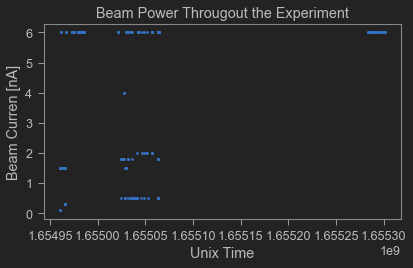

In [224]:
plt.plot(notes["Unix Timestamp"], notes["Beam Current [nA]"],'.')
plt.title("Beam Power Througout the Experiment")
plt.ylabel("Beam Curren [nA]")
plt.xlabel("Unix Time");

In [230]:
get_note(1.65505e9,5)

,Device,Short Name,Type of Test,Date,Time [PST],Unix Timestamp,Notes,Beam Current [nA],Scale Factor
142,Power Switching Relay Board - custom,psrb,Slow aging to 1650 rad,"June 12, 2022",16:23,1655050980,locking up and requesting 2nA => 500 count/s,2.0,1
141,USB to serial converter - FTDI chip,usb2serial,Slow aging to 1650 rad,"June 12, 2022",15:46,1655048760,Go up to 6 nA => 1500 count/s\r\nCompletely f...,6.0,1
143,Power Switching Relay Board - custom,psrb,Slow aging to 1650 rad,"June 12, 2022",16:30,1655051400,Shutter open beam started \r\nBoring so far 2 ...,2.0,1
140,USB to serial converter - FTDI chip,usb2serial,Slow aging to 1650 rad,"June 12, 2022",15:42,1655048520,Go up to 2 nA => 500 count /s\r\nNo errors up ...,2.0,1
144,Power Switching Relay Board - custom,psrb,Slow aging to 1650 rad,"June 12, 2022",16:33,1655051580,request 6nA => 1400 count/s\r\nStill boring,6.0,1


In [252]:
get_note(1.65505e9,5)['Notes'][143]

'Shutter open beam started \r\nBoring so far 2 minutes into it'

### Data

In [96]:
def read_merge_all(dflist, path, cond=lambda a : True):
    for file in os.listdir(path):
        if os.path.isfile(path+file):
            print(path+file)
            if cond(file):
                dflist.append(pd.read_csv(path+file))
        if os.path.isdir(path+file):
            print(path+file)
            read_merge_all(dflist,path+file+"/")

#### Arduino

In [217]:
path = base_path+"arduino"
ard_slow = pd.read_csv(path+"/data/slow_dose/ard1655071123.6531866.csv")

In [218]:
ard_slow.read_bytes = ard_slow.read_bytes.str.split(" ")
vals = []
label = []
for mem in ard_slow.read_bytes:
    if len(mem) > 1:
        label.append(mem[0])
        vals.append(mem[1].split("\r")[0])
        
vals = np.array(vals).astype(float)
label = np.array(label)
dat = {}

for l in set(label):
    dat[l] = vals[label==l]